# **Data Acquisition**

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faridahelmy1","key":"92b17482ad762001a64eab6a0da07b06"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d tanishqdublish/text-classification-documentation


Dataset URL: https://www.kaggle.com/datasets/tanishqdublish/text-classification-documentation
License(s): apache-2.0
  0% 0.00/1.85M [00:00<?, ?B/s]
100% 1.85M/1.85M [00:00<00:00, 122MB/s]


In [4]:
!unzip -q text-classification-documentation


In [5]:
import pandas as pd


In [6]:
df=pd.read_csv('df_file.csv')
df

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4


In [7]:
label_map = {
    0: "Politics",
    1: "sport",
    2: "Technology",
    3: "Entertainment",
    4: "Business"
}

df["label_name"] = df["Label"].map(label_map)

print(df[["Text", "Label", "label_name"]].head())


                                                Text  Label label_name
0  Budget to set scene for election\n \n Gordon B...      0   Politics
1  Army chiefs in regiments decision\n \n Militar...      0   Politics
2  Howard denies split over ID cards\n \n Michael...      0   Politics
3  Observers to monitor UK election\n \n Minister...      0   Politics
4  Kilroy names election seat target\n \n Ex-chat...      0   Politics


In [8]:
df.drop(columns=['Label'],axis=1,inplace=True)

# **Text Cleaning**

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [10]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def clean_text(Text):

    Text = Text.lower()

    Text = re.sub(r"[^a-z\s]", "", Text)

    words = [stemmer.stem(word) for word in Text.split() if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["Text"].apply(clean_text)
print(df.head())


                                                Text label_name  \
0  Budget to set scene for election\n \n Gordon B...   Politics   
1  Army chiefs in regiments decision\n \n Militar...   Politics   
2  Howard denies split over ID cards\n \n Michael...   Politics   
3  Observers to monitor UK election\n \n Minister...   Politics   
4  Kilroy names election seat target\n \n Ex-chat...   Politics   

                                          clean_text  
0  budget set scene elect gordon brown seek put e...  
1  armi chief regiment decis militari chief expec...  
2  howard deni split id card michael howard deni ...  
3  observ monitor uk elect minist invit intern ob...  
4  kilroy name elect seat target exchat show host...  


# **Feature Engineering**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1,2))  # Unigrams + Bigrams
X = vectorizer.fit_transform(df["clean_text"])


y = df["label_name"]

print(X.shape, y.shape)


(2225, 8000) (2225,)


# **Split Data**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (1780, 8000) Test size: (445, 8000)


# **Modeling**

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

# **Evaluation**

📌 Logistic Regression Report:

               precision    recall  f1-score   support

     Business       0.96      0.96      0.96       102
Entertainment       1.00      0.97      0.99        77
     Politics       0.98      0.99      0.98        84
   Technology       0.97      0.97      0.97        80
        sport       0.99      1.00      1.00       102

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



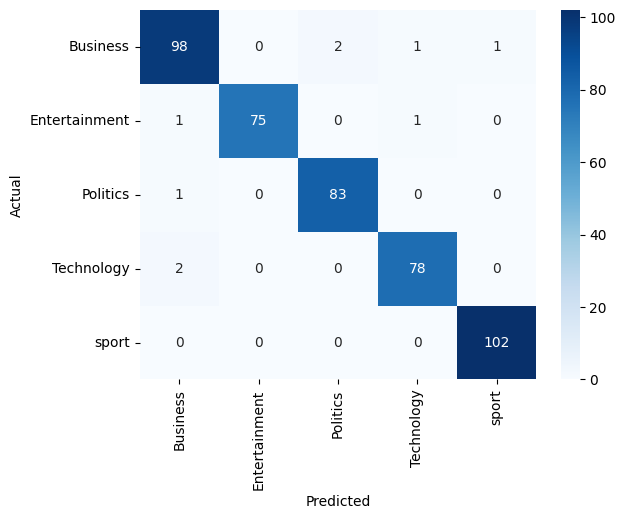

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)

print("📌 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Word Clouds**

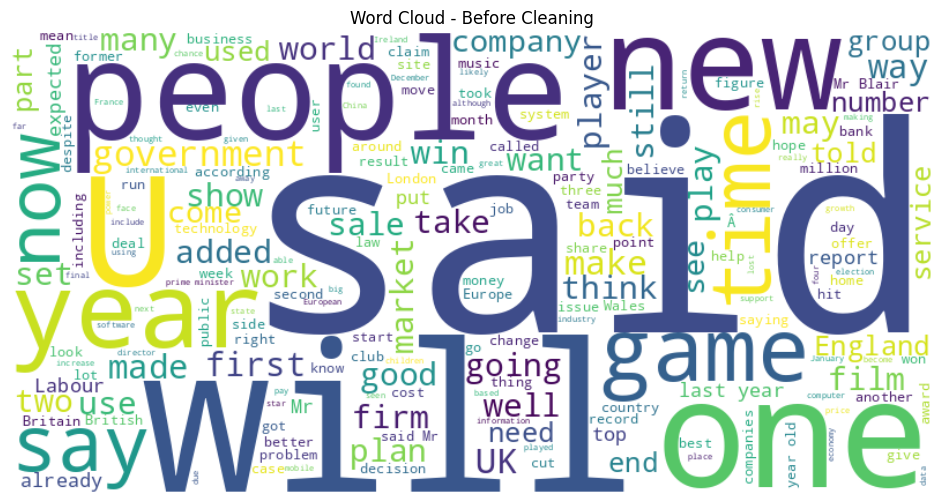

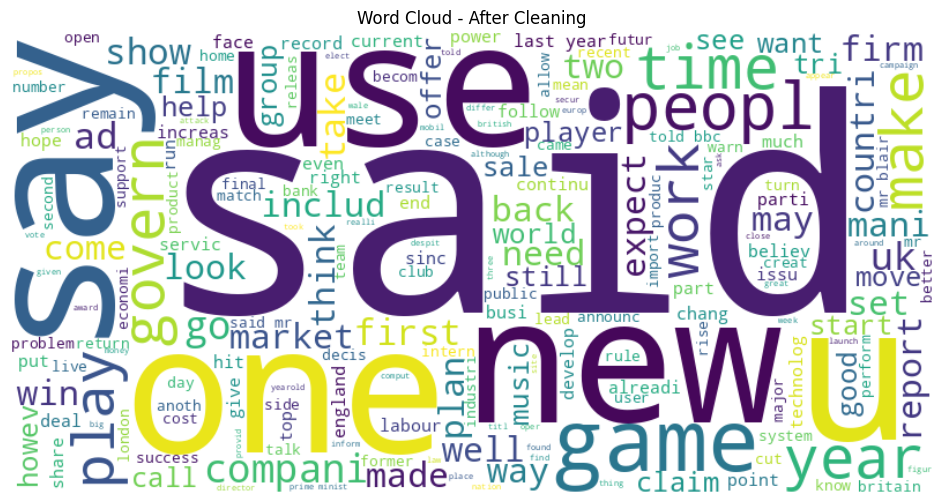

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud قبل التنظيف (النصوص الأصلية)
raw_text = " ".join(df["Text"])
wordcloud_raw = WordCloud(width=800, height=400, background_color="white").generate(raw_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_raw, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Before Cleaning")
plt.show()


# Word Cloud بعد التنظيف (النصوص المعالجة)
cleaned_text = " ".join(df["clean_text"])
wordcloud_clean = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_clean, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - After Cleaning")
plt.show()


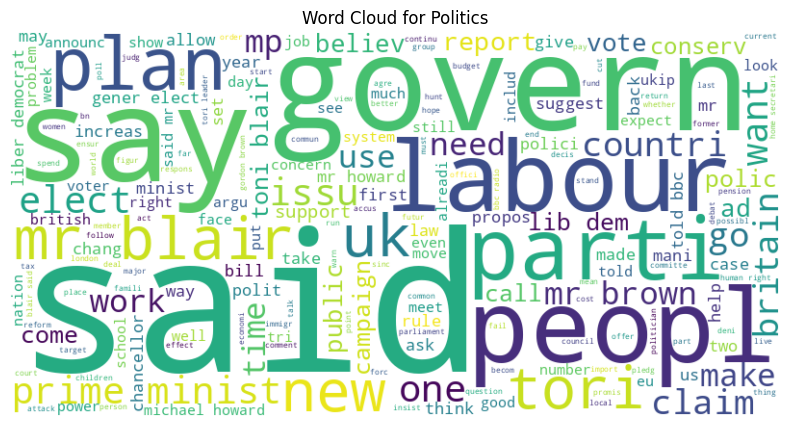

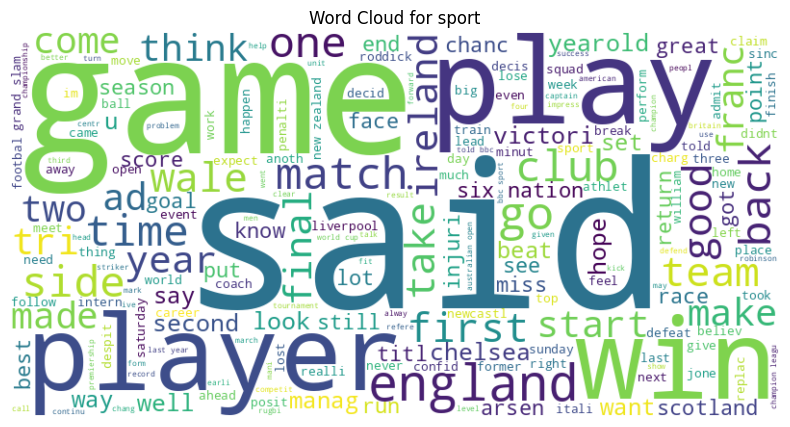

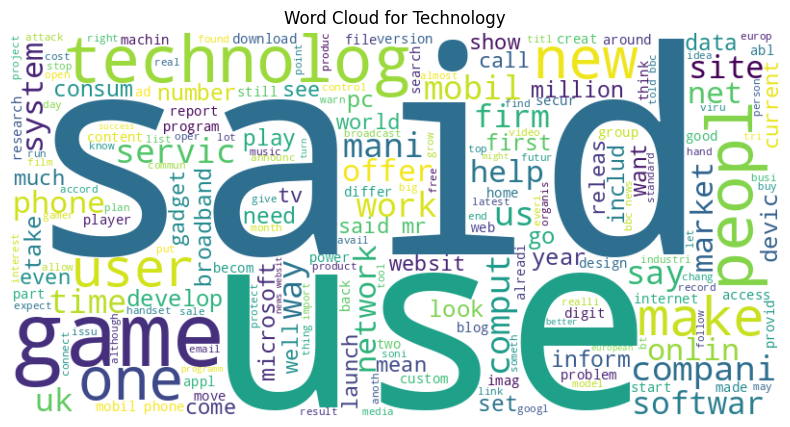

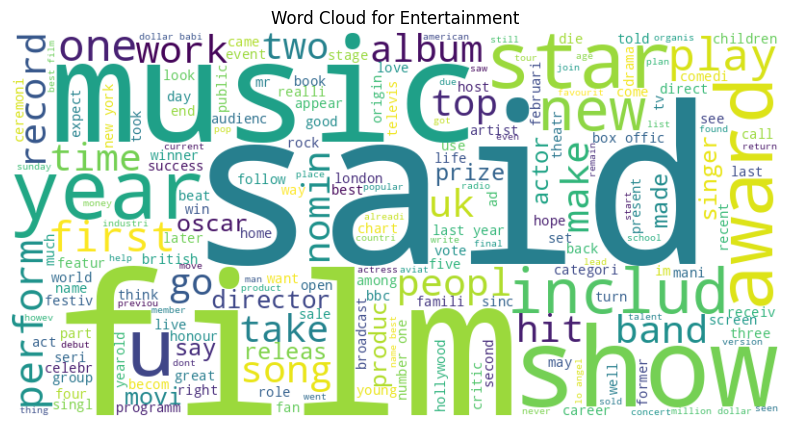

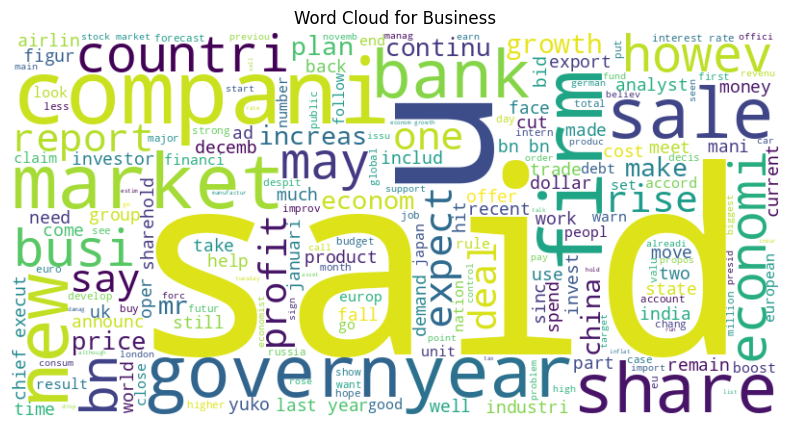

In [19]:
labels = df["label_name"].unique()

for label in labels:
    text = " ".join(df[df["label_name"] == label]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {label}")
    plt.show()

# **Save Model & Vectorizer**

In [20]:
import joblib

# Save the trained model and vectorizer
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.


# **Prediction**

In [21]:
# Load saved model
lr_model = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

test_texts = [
    "The government passed a new law today.",
    "The team won the championship.",
    "The stock market is down.",
    "The actor won an award.",
    "New AI technology launched."
]

test_vectors = vectorizer.transform(test_texts)
preds = lr_model.predict(test_vectors)

for text, label in zip(test_texts, preds):
    print(f"النص: {text}\nالتصنيف: {label}\n-----------")

النص: The government passed a new law today.
التصنيف: Politics
-----------
النص: The team won the championship.
التصنيف: sport
-----------
النص: The stock market is down.
التصنيف: Business
-----------
النص: The actor won an award.
التصنيف: Entertainment
-----------
النص: New AI technology launched.
التصنيف: Business
-----------


# **Cross Validation**

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross Validation Scores: [0.97977528 0.97078652 0.98202247 0.97752809 0.97752809]
Mean Accuracy: 0.9775280898876405


# **Class Distribution Visualization**

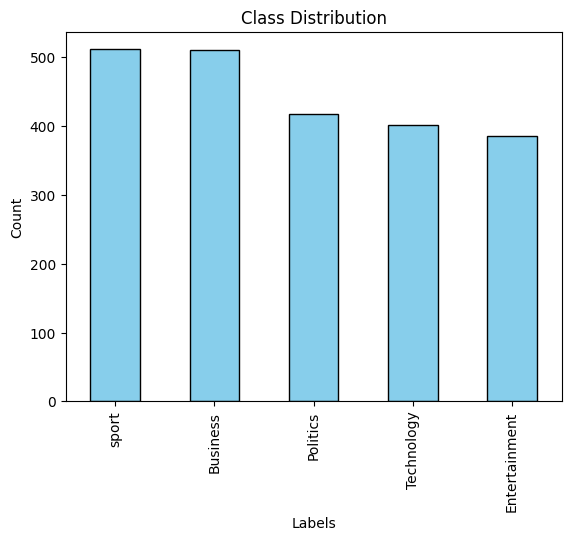

In [23]:
df["label_name"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Class Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

# **Try Other Models**

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC(max_iter=2000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n📌 {name} Report:")
    print(classification_report(y_test, preds))


📌 Logistic Regression Report:
               precision    recall  f1-score   support

     Business       0.96      0.96      0.96       102
Entertainment       1.00      0.97      0.99        77
     Politics       0.98      0.99      0.98        84
   Technology       0.97      0.97      0.97        80
        sport       0.99      1.00      1.00       102

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


📌 Naive Bayes Report:
               precision    recall  f1-score   support

     Business       0.96      0.96      0.96       102
Entertainment       1.00      0.94      0.97        77
     Politics       0.97      0.99      0.98        84
   Technology       0.94      0.97      0.96        80
        sport       1.00      1.00      1.00       102

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weigh

# **Compare Models Performance (Visualization)**

Logistic Regression Accuracy: 0.9798
Naive Bayes Accuracy: 0.9730
Random Forest Accuracy: 0.9708
SVM Accuracy: 0.9820


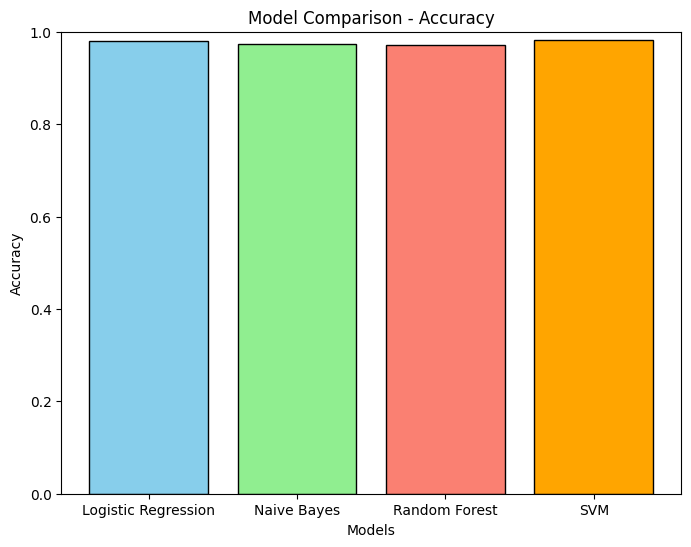

In [25]:
from sklearn.metrics import accuracy_score

model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    model_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Plot
plt.figure(figsize=(8,6))
plt.bar(model_scores.keys(), model_scores.values(), color=["skyblue","lightgreen","salmon","orange"], edgecolor="black")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0,1)
plt.show()
